# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [1]:
# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

%matplotlib inline

Прочитаем исходные данные:

In [2]:
data = pd.read_csv('data/unconv.csv')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов. 

Сделайте промежуточные выводы из проведённого разведывательного анализа.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Well     200 non-null    int64  
 1   Por      200 non-null    float64
 2   Perm     200 non-null    float64
 3   AI       200 non-null    float64
 4   Brittle  200 non-null    float64
 5   TOC      200 non-null    float64
 6   VR       200 non-null    float64
 7   Prod     200 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 12.6 KB
None


,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,14.991150,4.330750,2.968850,48.161950,0.990450,1.964300,4311.219852
std,57.879185,2.971176,1.731014,0.566885,14.129455,0.481588,0.300827,992.038414
min,1.000000,6.550000,1.130000,1.280000,10.940000,-0.190000,0.930000,2107.139414
25%,50.750000,12.912500,3.122500,2.547500,37.755000,0.617500,1.770000,3618.064513
50%,100.500000,15.070000,4.035000,2.955000,49.510000,1.030000,1.960000,4284.687348
75%,150.250000,17.402500,5.287500,3.345000,58.262500,1.350000,2.142500,5086.089761
max,200.000000,23.550000,9.870000,4.630000,84.330000,2.180000,2.870000,6662.622385


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


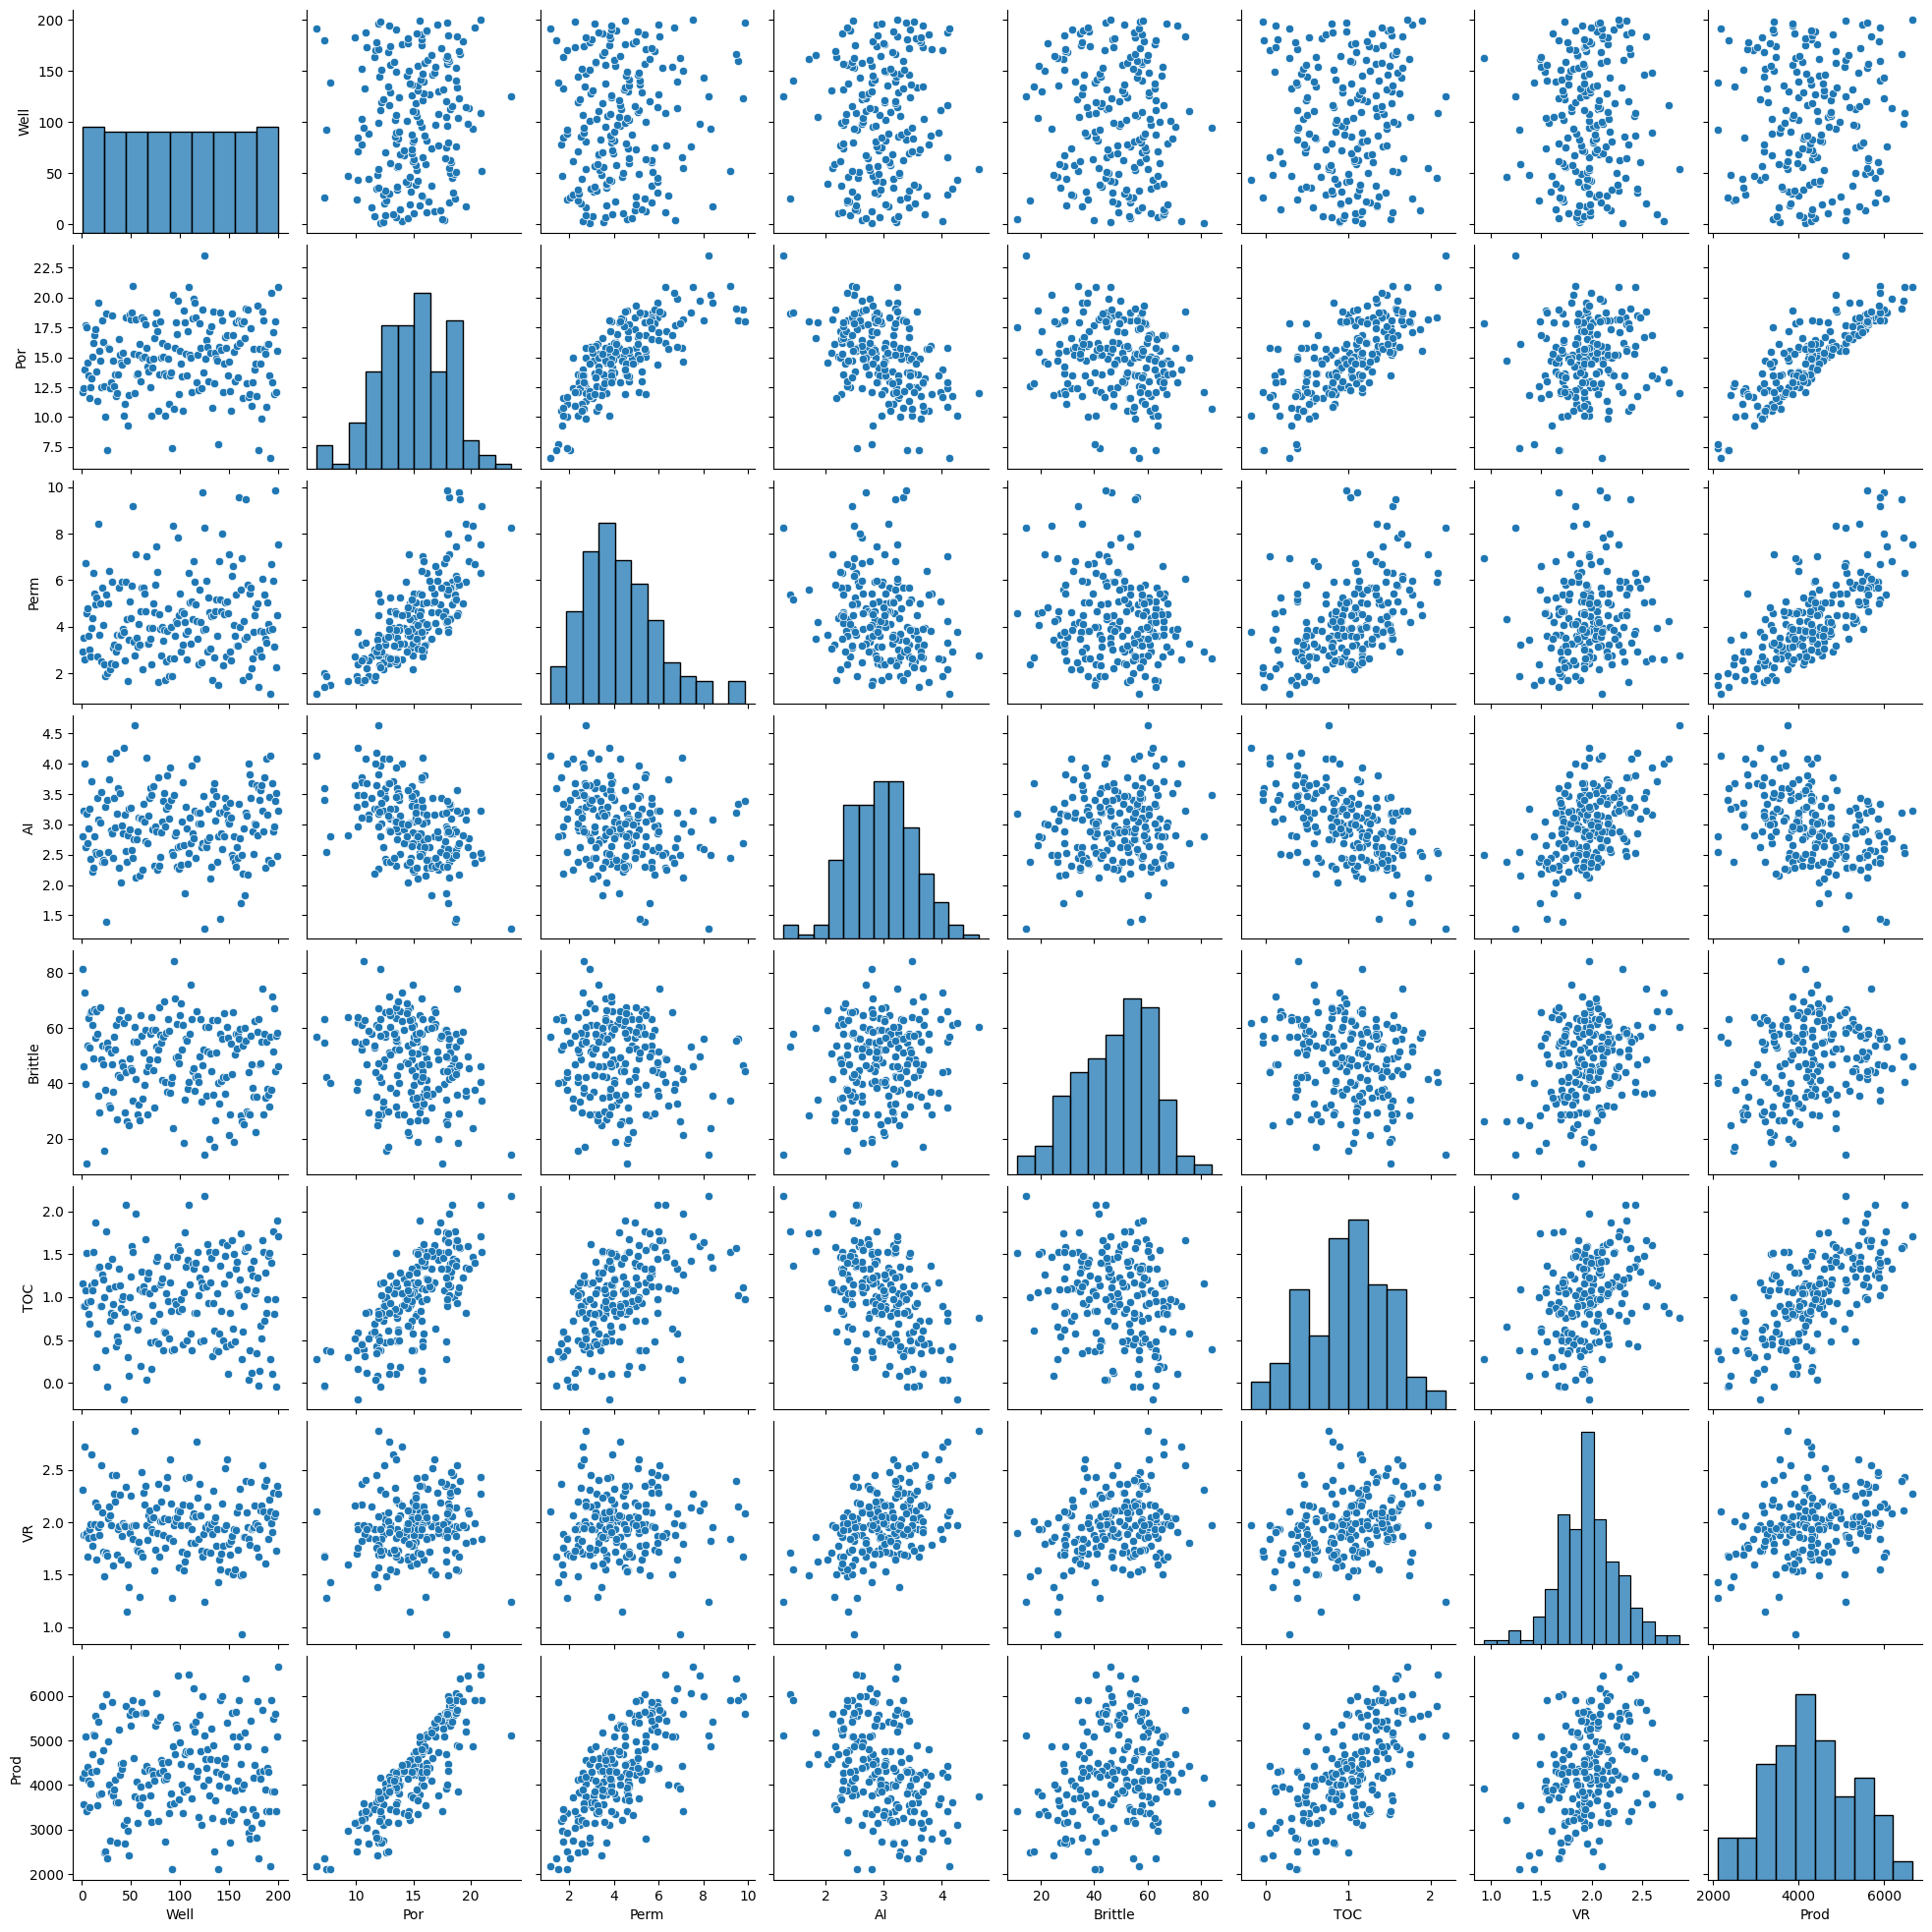

In [3]:
# Ваш код здесь
print(data.info())
display(data.describe())
pairplot = sns.pairplot(data=data);

### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак. 

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты. 

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных? 
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему? 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы. 

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

Ранг матрицы A: 8
Определитель матрицы A: 0.00073


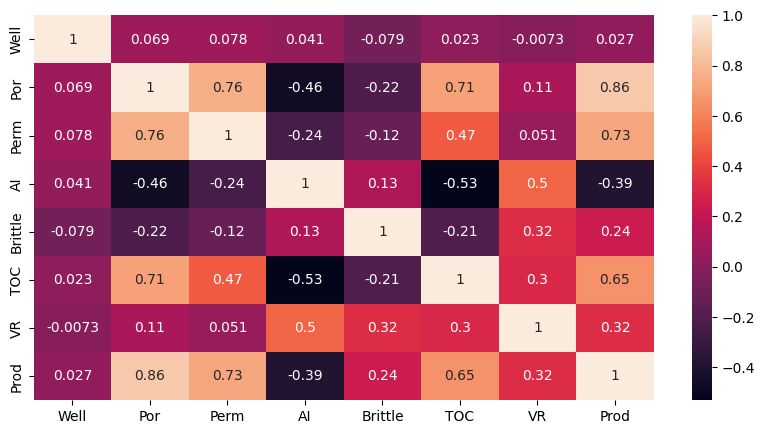

In [4]:
# Ваш код здесь
A = data.values # создаём матрицу А
A_cent = A - A.mean(axis=0) # Центрируем
A_st = A_cent/np.linalg.norm(A_cent, axis=0) # нормируем
A_corr = A_st.T@A_st # создаём матрицу Грама (выборочная корреляция)

# Визуализация матрицы корреляций
col_name = data.columns
plt.figure(figsize = (10, 5))
sns.heatmap(data=A_corr, annot=True, xticklabels=col_name, yticklabels=col_name);

# Определяем ранг матрицы корреляций, находим её определитель
A_rank = np.linalg.matrix_rank(A_corr)
A_det = np.linalg.det(A_corr)

print('Ранг матрицы A:', A_rank)
print('Определитель матрицы A:', A_det.round(5))

> *Ваши выводы здесь*  
Сильнее всего с целевой переменной коррелируют пористость скважины (*Por*), проницаемость скважины (*Perm*) и показатель общего органического углерода (*TOC*).

Корреляционная матрица плохо обусловлена, так как её определитель близок к нулю. Матрица почти вырождена.  
Так же эта матрица мультиколлинеарна и некоторые её факторы близки к линейной зависимости.  
В данном случае модель классической линейной регрессии по методу наименьших квадратов не применима, так как мультиколлинеарность может привести к неустойчивости коэффициентов. Так же увеличивается разброс коэффициентов регрессии. Всё это усложняет интерпретацию параметров регрессии, так как они теряют смысл.

### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки. 

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy. 

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [5]:
# Ваш код здесь
X = data.drop(['Prod'], axis=1).to_numpy()
y = data['Prod'].values
X = np.column_stack((np.ones(X.shape[0]), X))
w = np.linalg.inv(X.T@X)@X.T@y
print('Коэффициенты модели:', w.round())

Коэффициенты модели: [-1232.     0.   230.   116.  -365.    25.   -78.   785.]


> *Ваши выводы здесь*  
В наших данных имеется признак идентификатор скважины(*Well*), который никак не влияет на целевую переменную, так как его коэффициент почти равен нулю.  
Пример интерпретации этих коффициентов заключается в следующем. При увеличении пористости скважины(*Por*) на 1 процент медианное значение добычи газа в сутки увеличится на 230 миллионов кубических футов. Если акустический импеданс (*AI*) увеличится на 1 кг/м2 * 10^6 медианное значение целевой метрики упадёт на 365 млн. куб. футов.

### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной. 

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день. 

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата. 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

In [6]:
# Ваш код здесь
x_new = {
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }

y_true = 4748.315024

# Преобразуем данные
x_new = np.array([list(x_new.values())])
x_new = np.column_stack((1, x_new))
# Получаем целевое значение и ошибку
y_pred_new = x_new@w
error = y_true - y_pred_new
print(f'Абсолютная ошибка прогноза новой скважины: {error[0].round(1)} млн. куб. футов.')

# Предсказываем значения на всех данных
y_pred = X@w

# Рассчёт ошибок
mae = abs(y - y_pred).sum()/X.shape[0]
mape = abs((y - y_pred)/y).sum()*(100/200)

# mse = ((y - y_pred)**2).sum()/X.shape[0]
# mse_mean = ((y - y.mean())**2).sum()/X.shape[0]
# r2 = 1 - mse/mse_mean

print()
print(f'Средняя абсолютная ошибка: {mae.round(1)} млн. куб. футов.')
print(f'Средняя абсолютная ошибка в процентах: {mape.round(1)}%')

# Рассчёт с помощью библиотеки sklearn
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X = data.drop(['Prod'], axis=1)
y = data['Prod']

lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X)

print()
print('Расчёт с помощью sklearn')
print(f'Средняя абсолютная ошибка: {metrics.mean_absolute_error(y, y_pred).round(1)} млн. куб. футов.')
print(f'Средняя абсолютная ошибка в процентах: {metrics.mean_absolute_percentage_error(y, y_pred)*100:.1f}%')

Абсолютная ошибка прогноза новой скважины: 25.3 млн. куб. футов.

Средняя абсолютная ошибка: 153.6 млн. куб. футов.
Средняя абсолютная ошибка в процентах: 3.6%



Расчёт с помощью sklearn
Средняя абсолютная ошибка: 153.6 млн. куб. футов.
Средняя абсолютная ошибка в процентах: 3.6%


> *Ваши выводы здесь*  
По результатам метрик можно наблюдать среднюю абсолютную ошибку по прогнозам добычи газа в сутки имеющихся скважин, которая составляет 153.6 млн куб. футов. Эта же ошибка, для большей наглядности, показана в виде процентного отклонения от реальных показателей и составляет около 3.6%, что довольно не плохой показатель.

### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**). 

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

Коэффициенты модели: 
 [   0.  230.  116. -365.   25.  -78.  785.]


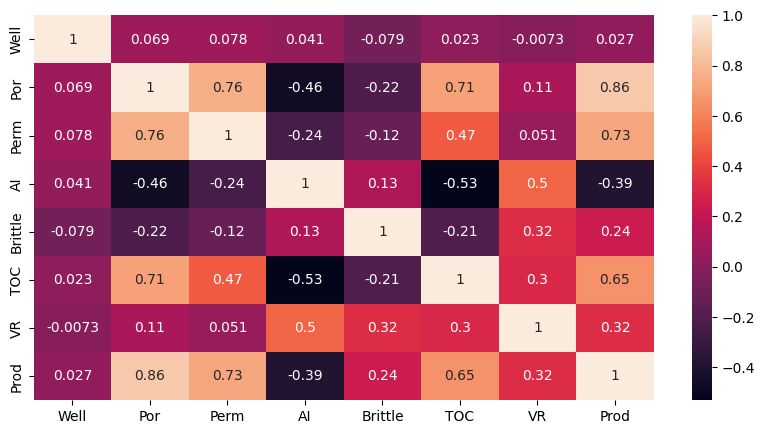

In [7]:
# Ваш код здесь
print('Коэффициенты модели:', '\n', w[1:].round())
plt.figure(figsize = (10, 5))
sns.heatmap(data=A_corr, annot=True, xticklabels=col_name, yticklabels=col_name);

> *Ваши выводы здесь*  
В нашей модели есть коэффициент, который противоречит соответствующему коэффициенту корреляции. Это общий органический углерод (*TOC*).  
Можно предположить, что это произошло из-за нестандартизированных данных, на которых обучалась модель.

### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики). 

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее. 
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

In [8]:
# Ваш код здесь

# Избавляемся от скоррелированных данных и проводим рассчёты
X = data.drop(['Well', 'Perm', 'TOC', 'Prod'], axis=1).to_numpy()
X = np.column_stack((np.ones(X.shape[0]), X))
w = np.linalg.inv(X.T@X)@X.T@y
print('Коэффициенты модели:', w[1:].round())

y_pred = X@w

mae = abs(y - y_pred).sum()/X.shape[0]
mape = abs((y - y_pred)/y).sum()*(100/200)

print()
print(f'Средняя абсолютная ошибка: {mae:.1f} млн. куб. футов.')
print(f'Средняя абсолютная ошибка в процентах: {mape.round(1)}%')

Коэффициенты модели: [ 293. -200.   28.  517.]

Средняя абсолютная ошибка: 171.4 млн. куб. футов.
Средняя абсолютная ошибка в процентах: 4.0%


> *Ваши выводы здесь*
После удаления скоррелированных данных мы получили немного другие коэффициенты модели. Теперь, при увеличении пористости скважины(*Por*) на 1 процент, медианное значение добычи газа в сутки увеличится на 293 млн. куб. футов. А если акустический импеданс (*AI*) увеличится на 1 кг/м2 * 10^6 медианное значение целевой метрики упадёт на 200 млн. куб. футов.

Значение метрик несколько изменилось не в лучшую сторону. Наша модель показывает ошибку на 0.4 процента хуже до удаления факторов.

Если говорить о противоречие коэффициентов линейной регрессии и корреляции, то нам удалось это побороть.

### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную. 

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее. 

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [9]:
# Ваш код здесь
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Отбираем нужные факторы
X = data.drop(['Well', 'Perm', 'TOC', 'Prod'], axis=1)
y = data['Prod']

# Обучаем модель
lr = LinearRegression()
lr.fit(X, y)

print('Коэффициенты модели:', lr.coef_.round())

# Предсказываем
y_pred = lr.predict(X)
print()

print(f'Средняя абсолютная ошибка: {metrics.mean_absolute_error(y, y_pred).round(1)} млн. куб. футов.')
print(f'Средняя абсолютная ошибка в процентах: {metrics.mean_absolute_percentage_error(y, y_pred)*100:.1f}%')

Коэффициенты модели: [ 293. -200.   28.  517.]

Средняя абсолютная ошибка: 171.4 млн. куб. футов.
Средняя абсолютная ошибка в процентах: 4.0%


> *Ваши выводы здесь*  
Построение линейной регрессии для рассчёта прогноза целевой метрики вручную и с помощью библиотеки sklearn идентично.

## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию. 

Приступим! Выполните задания 8.1–8.5:


In [10]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`. 

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [11]:
# Ваш код здесь
# Стандартизируем данные
std_scal = StandardScaler()
X_scal = std_scal.fit_transform(X)

# Создаём полиномиальные признаки
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X_scal)
print('Размерность полученных данных:', X_poly.shape)

# Проводим кросс-валидацию на модели линейной регрессии
lr = LinearRegression()

cv_res = cross_validate(lr, X_poly, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)

# Метрики
mape_train_lr = -cv_res['train_score'].mean()* 100
mape_valid_lr = -cv_res['test_score'].mean() * 100

print()
print('MAPE на тренировочных фолдах: {:.2f} %'.format(mape_train_lr))
print('MAPE на валидационных фолдах: {:.2f} %'.format(mape_valid_lr))

Размерность полученных данных: (200, 34)

MAPE на тренировочных фолдах: 1.77 %
MAPE на валидационных фолдах: 2.68 %


> Нам удалось улучшить показатели за счёт полиномиальных признаков. Третья степень полиномиальности увеличило количество признаков в 8.5 раз. Нам желательно сократить разницу между результатами метрики на тренировочных и на валидацилонных фолдах. Посмотрим на результаты других моделей.

### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

Коэффициент регуляризации: 4.947
MAPE на тренировочных фолдах: 1.83 %
MAPE на валидационных фолдах: 2.28 %


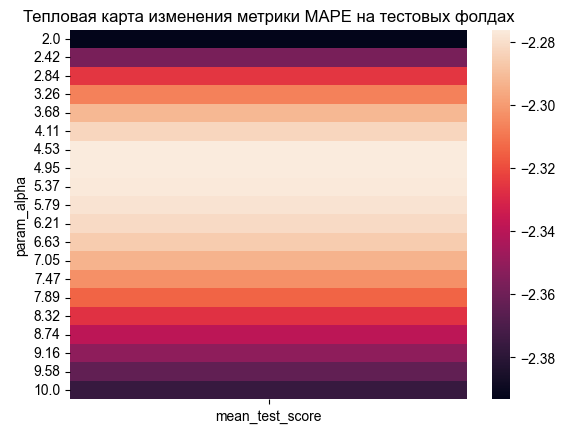

In [12]:
# Ваш код здесь
# Проводим подбор параметров и кросс-валидацию. Регуляризация L1.
lasso = Lasso(max_iter=3000, random_state=42)

# Подбираем оптимальные параметры
param_grid = {'alpha' : np.linspace(2, 10, 20)}
grid_search = GridSearchCV(lasso, param_grid, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
grid_search.fit(X_poly, y)

# Коэффициент регуляризации
alpha_lasso = grid_search.best_params_.get('alpha').round(3)
print('Коэффициент регуляризации:', alpha_lasso)

# Выводим результаты метрики
mape_train_lasso = -grid_search.cv_results_['mean_train_score'][grid_search.best_index_]*100
mape_valid_lasso = -grid_search.best_score_*100

print('MAPE на тренировочных фолдах: {:.2f} %'.format(mape_train_lasso))
print('MAPE на валидационных фолдах: {:.2f} %'.format(mape_valid_lasso))

# Визуализируем динамику изменения метрики
visual = pd.pivot_table(pd.DataFrame(grid_search.cv_results_),
               values='mean_test_score', index='param_alpha')
heatmap = sns.heatmap(visual*100, yticklabels=np.linspace(2, 10, 20).round(2))
plt.title('Тепловая карта изменения метрики MAPE на тестовых фолдах')
sns.set(rc={'figure.figsize':(8, 4)});

> Показатели улучшились на валидационных фолдах на 0.4% при регуляризации L1 на полиномиальных признаках. Показатели на тренировочных фолдах приблизились к валидационным. Коэффициент регуляризации довольно большой 4.947. Отдельно кросс-валлидация, с помощью `cross_validate`, не проводилась, так как мы провели её внутри подбора наилучших параметров с помощью `GridSearchCV`.

### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

Коэффициент регуляризации: 0.167
MAPE на тренировочных фолдах: 1.77 %
MAPE на валидационных фолдах: 2.67 %


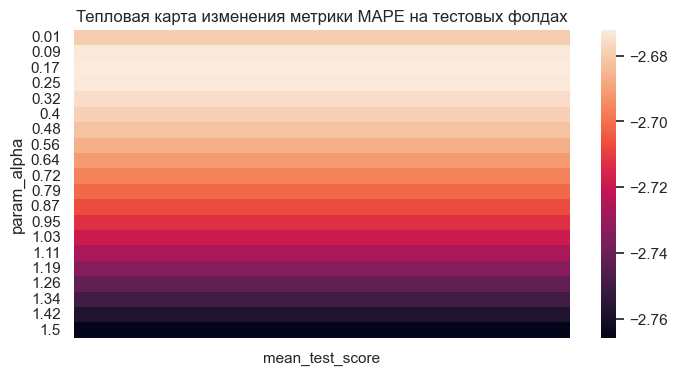

In [13]:
# Ваш код здесь
# Проводим подбор параметров и кросс-валидацию. Регуляризация L2
ridge = Ridge(random_state=42)

param_grid = {'alpha' : np.linspace(0.01, 1.5, 20)}
grid_search = GridSearchCV(ridge, param_grid, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
grid_search.fit(X_poly, y)

# Коэффициент регуляризации
alpha_ridge = grid_search.best_params_.get('alpha').round(3)
print('Коэффициент регуляризации:', alpha_ridge)

# Выводим результаты метрики
mape_train_ridge = -grid_search.cv_results_['mean_train_score'][grid_search.best_index_]*100
mape_valid_ridge = -grid_search.best_score_*100

print('MAPE на тренировочных фолдах: {:.2f} %'.format(mape_train_ridge))
print('MAPE на валидационных фолдах: {:.2f} %'.format(mape_valid_ridge))

# Визуализируем динамику изменения метрики
visual = pd.pivot_table(pd.DataFrame(grid_search.cv_results_),
               values='mean_test_score', index='param_alpha')
heatmap = sns.heatmap(visual*100, yticklabels=np.linspace(0.01, 1.5, 20).round(2))
plt.title('Тепловая карта изменения метрики MAPE на тестовых фолдах')
sns.set(rc={'figure.figsize':(8, 4)});

> Регуляризация L2 не так успешно справилась с задачей, как регуляризация L1. Показатель на валидационных фолдах откатился к результатам классической МНК модели. Можно предположить, что признаков всё же больше чем необходимо, так как регуляризация L1 зануляет неподходящие факторы с сильной корреляцией.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

Коэффициент регуляризации: 4.737
MAPE на тренировочных фолдах: 1.82 %
MAPE на валидационных фолдах: 2.28 %


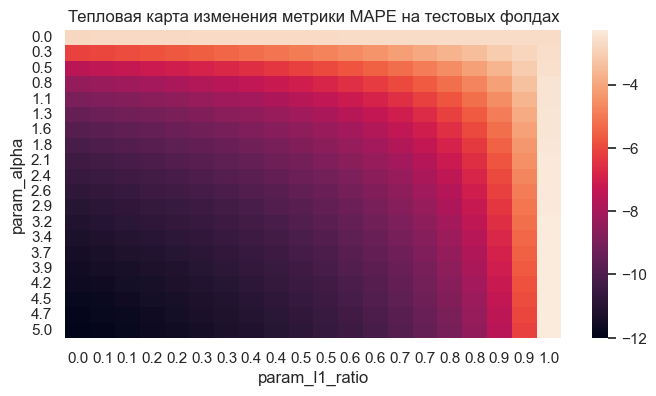

In [14]:
# Ваш код здесь
# Проводим подбор параметров и кросс-валидацию. Регуляризации L1 и L2.
el_net = ElasticNet(random_state=42, max_iter=5000)

param_grid = {'alpha' : np.linspace(0.01, 5, 20),
              'l1_ratio' : np.linspace(0.01, 1, 20)}
grid_search = GridSearchCV(el_net, param_grid, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
grid_search.fit(X_poly, y)

# Коэффициент регуляризации
alpha_el_net = grid_search.best_params_.get('alpha').round(3)
print('Коэффициент регуляризации:', alpha_el_net)

# Выводим результаты метрики
mape_train_el_net = -grid_search.cv_results_['mean_train_score'][grid_search.best_index_]*100
mape_valid_el_net = -grid_search.best_score_*100

print('MAPE на тренировочных фолдах: {:.2f} %'.format(mape_train_el_net))
print('MAPE на валидационных фолдах: {:.2f} %'.format(mape_valid_el_net))

# Визуализируем динамику изменения метрики
visual = pd.pivot_table(pd.DataFrame(grid_search.cv_results_),
               index='param_alpha', values='mean_test_score', columns='param_l1_ratio')
heatmap = sns.heatmap(visual*100, fmt='.2g', xticklabels=np.linspace(0.01, 1, 20).round(1), yticklabels=np.linspace(0.01, 5, 20).round(1))
plt.title('Тепловая карта изменения метрики MAPE на тестовых фолдах')
sns.set(rc={'figure.figsize':(10, 5)});

> По итогам подбора гиперпараметров лучшим значением для параметра `l1-ratio` стало 1. А поскольку коэффициент регуляризации всёже не равен нулю, то мы получаем *Lasso*-регрессию. Регуляризация эластичная сеть показывает, что лучше воспользоваться регуляризацией L1 без регуляризации L2. Коэффициент *alpha* почти такой же 4.737.

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [15]:
# Ваш код здесь
# Подготавливаем столбцы
model = ['lr', 'lasso', 'ridge', 'el_net']
hyperparameters = [np.nan, alpha_lasso, alpha_ridge, alpha_el_net]
Poly_features = [True, True, True, True]
mape_train = [mape_train_lr, mape_train_lasso, mape_train_ridge, mape_train_el_net]
mape_valid = [mape_valid_lr, mape_valid_lasso, mape_valid_ridge, mape_valid_el_net]

# Формируем таблицу
result_table = pd.DataFrame({
    'models' : model,
    'hyperparameters' : hyperparameters,
    'Poly_features' : Poly_features,
    'mape_train' : [round(x, 3) for x in mape_train],
    'mape_valid' : [round(x, 3) for x in mape_valid]
})

display(result_table)

,models,hyperparameters,Poly_features,mape_train,mape_valid
0,lr,NaN,True,1.773,2.681
1,lasso,4.947,True,1.827,2.276
2,ridge,0.167,True,1.773,2.672
3,el_net,4.737,True,1.823,2.276


> По итогам соревнования на лучшую модель в решении данной задачи побеждает модель с *Losso*-регуляризацией. Лучший показатель метрики на валидаионных фолдах и самый близкий к нему показатель на тренировочных фолдах. Полиномиальные признаки третьей степени использовались во всех моделях. В классической МНК-модели ячейка с параметром *alpha* пустует, так как для неё этот параметр не предусмотрен концепцией формулы.